In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import thermogram_utilities

import warnings
warnings.filterwarnings("ignore")

mixed = pd.read_excel("mixed_thermograms.xlsx")

In [2]:
mixed.groupby(["DiseaseGroup"])["code"].value_counts()

DiseaseGroup             code
ALS                      ALS      12
Anti-CCP                 CCP      10
CIN                      CIN      67
Centromere               CEN      10
Chromatin / Ribo-P / Sm  CHR      10
Diabetes                 DBT      33
Early RA                 ERA      10
Endometrial              END       8
Gammopathy               GAM       4
Heart                    HRT      18
Jo-1 (polymyositis)      JOF      25
Lung                     LUN      50
Lupus                    SLE     299
                         LUF      50
                         LUP       2
Lyme                     LYM      10
Melanoma                 MEL       7
Multiple sclerosis       MSC      20
Myocardial infarction    MCI      20
Normal                   NML     122
Ovarian                  OVA      12
Pelvic mass              PEL      16
Phenytoin                PHN       6
Rheumatoid arthritis     RAF      18
                         RAA      11
Ro52                     ROF      10
Scl-70  

In [3]:
mixed_long = pd.melt(mixed, id_vars=["DiseaseGroup", "sampleID", "code"], var_name="temp", value_name="dsp" )

mixed_long["temp"] = mixed_long["temp"].str.replace("T", "")
mixed_long["temp"] = mixed_long["temp"].astype(float)

In [4]:
median_df = thermogram_utilities.median_curve(mixed_long, "code", "temp", "dsp")

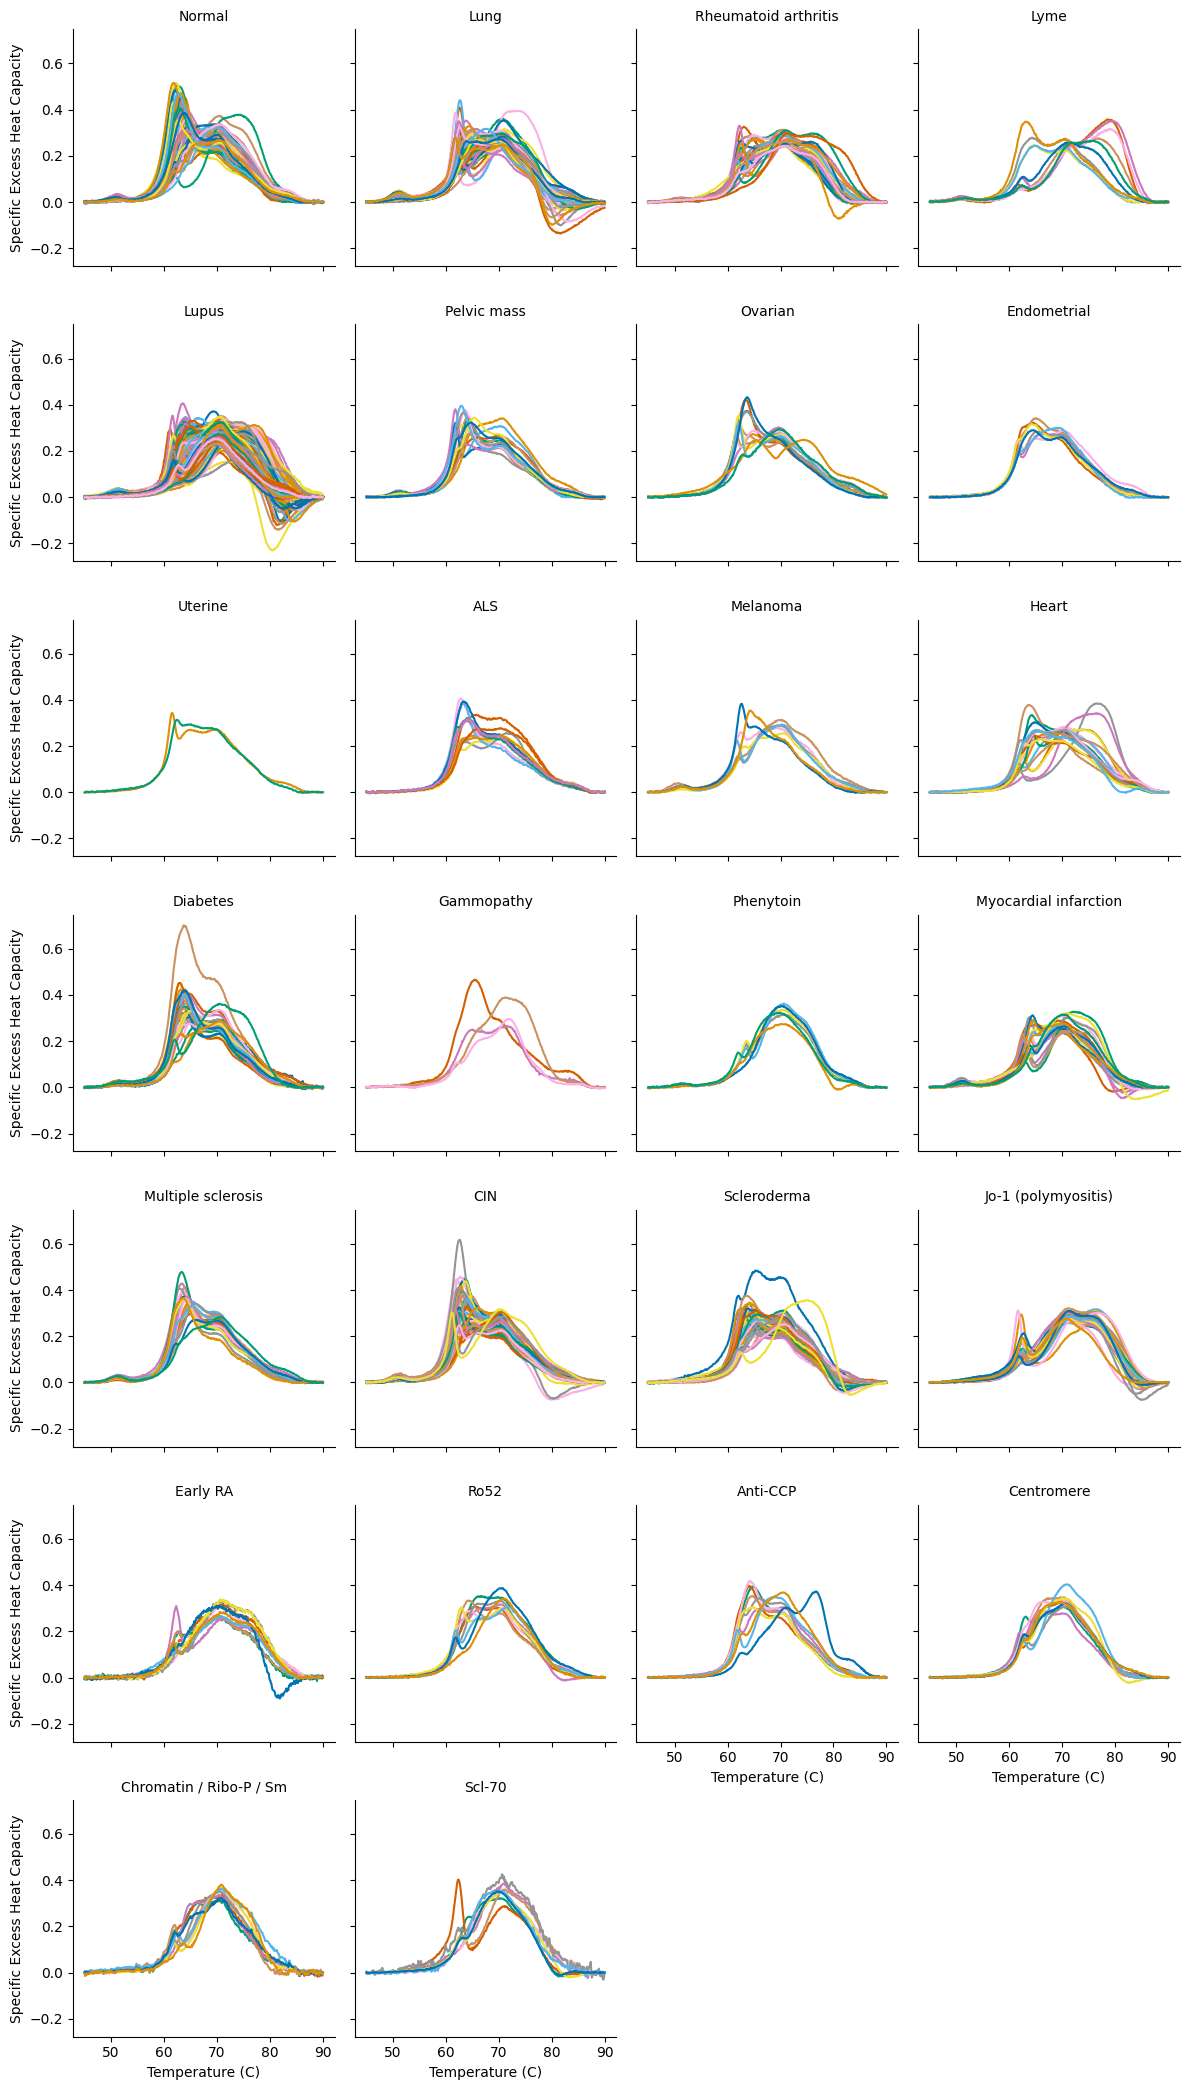

In [5]:
g = sns.FacetGrid(mixed_long, col="DiseaseGroup", col_wrap= 4, hue="sampleID", palette = 'colorblind')
g.map_dataframe(sns.lineplot, x="temp", y="dsp")
g.set_axis_labels("Temperature (C)", "Specific Excess Heat Capacity")
g.set_titles(col_template="{col_name}")
plt.show()